In [49]:
from math import sqrt, pi, factorial, exp
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy import optimize
import pandas as pd
from matplotlib.ticker import MaxNLocator

1\. **Hurricanes per Year**

The number of hurricanes in 2005 was 15. The historic average is 6.3. Is this number signficantly different?
- Assume the number of hurricanes is random, i.e. follows the Poisson distribution.
- Assume as statistically significant a probability that has a Z score of 3 or larger with respect a normal distribution.

**Hint**: compute the probability that in a single year are observed 15 or more hurricances.

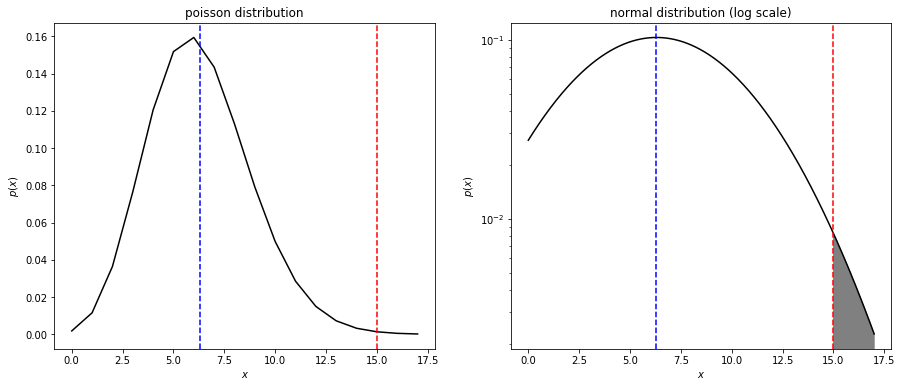

Z score = 2.2463303408003017
p-value = 0.02468285653931758 

assuming significance level alpha=0.05, the probability of having 15 or more hurricanes in a year is rejected


In [2]:
def poisson_distribution(l,n):
    return l**n * exp(-l) / factorial(n)

avg = 6.3 #avg hurricanes for year
x0 = 15  #hurricanes measured in 2005

fig, (ax1, ax2) = plt.subplots(figsize=(15,6), ncols=2)

meass = np.linspace(0, 17, 18)
probs = np.linspace(0, 1,  18)
#poiss = np.random.poisson(lam=6.3, size=18)

for i in range(len(meass)):
    probs[i] = poisson_distribution(avg, meass[i])
    
ax1.set_title('poisson distribution')
ax1.plot(meass, probs, marker='', color='black')
ax1.axvline(x0, linestyle='--', color='red')
ax1.axvline(avg, linestyle='--', color='blue')
ax1.set_ylabel("$p(x)$")
ax1.set_xlabel("$x$")

#normal distribution
sigma = sqrt(avg)
#w = avg - x0
x = np.linspace(0, 17, 1000)
y = stats.norm.pdf(x, loc=avg, scale=sigma)

ax2.set_title('normal distribution (log scale)')
ax2.plot(x, y, color='black')
ax2.fill_between(x, y, where=np.abs(x) > x0, color='gray')
ax2.axvline(x0, linestyle='--', color='red')
ax2.axvline(avg, linestyle='--', color='blue')
ax2.set_ylabel("$p(x)$")
ax2.set_xlabel("$x$")
plt.yscale("log")

plt.show()

#statistics
Z = abs(x0 - avg) / sigma
print('Z score =', Z)
pvalue = stats.norm.cdf(-Z) + (1. - stats.norm.cdf(Z))
print('p-value =', pvalue, '\n')
print('assuming significance level alpha=0.05, the probability of having 15 or more hurricanes in a year is rejected')

2\. **Pairwise t-test**

In an experiment, a group of 10 individuals agreed to participate in a study of blood pressure changes following exposure to halogen lighting. Resting systolic blood pressure was recorded for each individual. The participants were then exposed to 20 minutes in a room lit only by halogen lamps. A post-exposure systolic blood pressure reading was recorded for each individual. The results are presented in the following data set:

```python
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])
```

Determine whether the change in blood pressures within our sample was statistically significant.

**Hint:**
in this case, the Student's $t$-test should be performed to compare the two datasets.
Use the following test statistics:

$$T = \frac{\bar{x}_1 - \bar{x}_2}{\sigma \sqrt{\frac{2}{n}}}$$

and 

$$\sigma = \sqrt{\frac{\sigma_1^2 + \sigma_2^2}{2}}$$

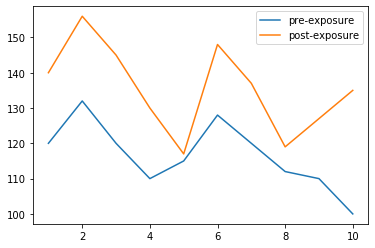

we used T-Student's test (sample size 10) and we obtained:
      - T-Student =  -0.7983692652584223
      - sigma = 10.474970167021958
      - p-value = 0.4452112649853399 

since p-value>alpha/2 we accept the null hypothesis, so we conclude blood pressure variation in individuals we observed is statistically significant


In [123]:
men = np.linspace(1,10,10)
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])

#mean and std calculation
pre_mean, pre_std = pre.mean(), pre.std()
post_mean, post_std = post.mean(), post.std()
n = len(men)

#plot
plt.plot(men, pre, label='pre-exposure')
plt.plot(men, post, label='post-exposure')
plt.legend()
plt.show()

#statistics
sigma = sqrt((pre_std**2 + post_std**2) / 2)
T = (pre_mean - post_mean) / sigma*sqrt(2/n)
pvalue = stats.t.cdf(T, n - 1) + (1. - stats.t.cdf(-T, n - 1))

print('we used T-Student\'s test (sample size 10) and we obtained:')
print('      - T-Student = ', T)
print('      - sigma =', sigma)
print('      - p-value =', pvalue, '\n')
print('since p-value>alpha/2 we accept the null hypothesis, so we conclude blood pressure variation in individuals we observed is statistically significant')

3\. **FFT of a simple dataset**

Perform a periodicity analysis on the lynxs-hares population, i.e. determine what is the period of the population of these animals.

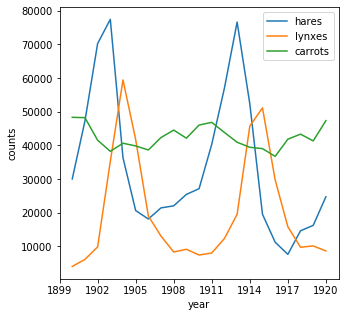

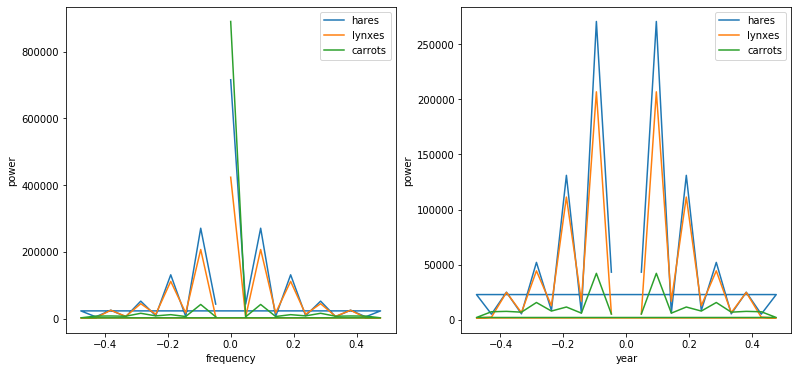

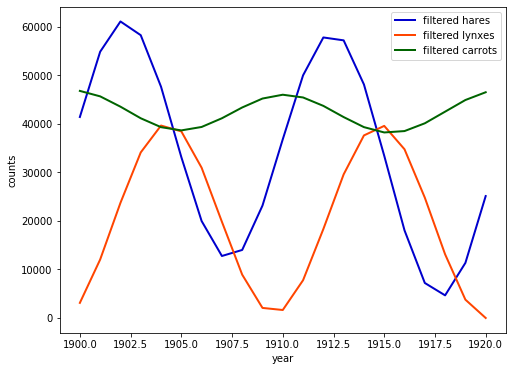

hares population period: 10.5 years
lynxes population period: 10.5 years
carrots population period: 10.5 years


In [64]:
#load file
file = np.loadtxt('populations.txt')
    
df = pd.DataFrame({'year': file[:,0],
                   'hare': file[:,1],
                   'lynx': file[:,2],
                   'carrot': file[:,3]}, dtype=int)

#data plots
plt.figure(figsize=(5, 5))
ax = plt.subplot(1, 1, 1)
ax.plot(df['year'], df['hare'], label='hares')
ax.plot(df['year'], df['lynx'], label='lynxes')
ax.plot(df['year'], df['carrot'], label='carrots')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.legend()
ax.set_xlabel('year')
ax.set_ylabel('counts')
plt.show()

#fast fourier transforms
from scipy import fftpack
har_fft = fftpack.fft(df['hare'])
lyn_fft = fftpack.fft(df['lynx'])
car_fft = fftpack.fft(df['carrot'])

#power (eliminates complex values)
har_pow = np.abs(har_fft)
lyn_pow = np.abs(lyn_fft)
car_pow = np.abs(car_fft)

#sample frequencies
har_freq = fftpack.fftfreq(df['hare'].size)
lyn_freq = fftpack.fftfreq(df['lynx'].size)
car_freq = fftpack.fftfreq(df['carrot'].size)

#plot FFT powers
plt.figure(figsize=(13,6))
plt.subplot(1, 2, 1)
plt.plot(har_freq, har_pow, label='hares')
plt.plot(lyn_freq, lyn_pow, label='lynxes')
plt.plot(car_freq, car_pow, label='carrots')
plt.legend()
plt.xlabel('frequency')
plt.ylabel('power')

#calculations on frequencies peaks
har_posfreq = har_freq[har_freq > 0]
lyn_posfreq = lyn_freq[lyn_freq > 0] 
car_posfreq = car_freq[car_freq > 0]
har_pospow = har_pow[har_pow > 0]
lyn_pospow = lyn_pow[lyn_pow > 0]
car_pospow = car_pow[car_pow > 0]
har_pospow = np.delete(har_pospow, 0) #removing first peak near 0
lyn_pospow = np.delete(lyn_pospow, 0)
car_pospow = np.delete(car_pospow, 0)
har_maxfreq = har_posfreq[har_pospow.argmax()]
lyn_maxfreq = lyn_posfreq[lyn_pospow.argmax()]
car_maxfreq = car_posfreq[car_pospow.argmax()]

plt.subplot(1, 2, 2)
plt.plot(har_freq[1:], har_pospow, label='hares')
plt.plot(lyn_freq[1:], lyn_pospow, label='lynxes')
plt.plot(car_freq[1:], car_pospow, label='carrots')
plt.legend()
plt.xlabel('year')
plt.ylabel('power')
plt.show()

#remove random noise
high_freq_har_fft = har_fft.copy()
high_freq_lyn_fft = lyn_fft.copy()
high_freq_car_fft = car_fft.copy()
high_freq_har_fft[np.abs(har_freq) > har_maxfreq] = 0
high_freq_lyn_fft[np.abs(lyn_freq) > lyn_maxfreq] = 0
high_freq_car_fft[np.abs(car_freq) > car_maxfreq] = 0
filtered_har = fftpack.ifft(high_freq_har_fft)
filtered_lyn = fftpack.ifft(high_freq_lyn_fft)
filtered_car = fftpack.ifft(high_freq_car_fft)
real_filtered_har = np.real(filtered_har)
real_filtered_lyn = np.real(filtered_lyn)
real_filtered_car = np.real(filtered_car)

# plot the result of the IFFT
plt.figure(figsize=(8, 6))
#plt.plot(df['year'], df['hare'], alpha=1, label='original hares')
#plt.plot(df['year'], df['lynx'], alpha=1, label='original lynxes')
#plt.plot(df['year'], df['carrot'], alpha=1, label='original carrots')
plt.plot(df['year'], real_filtered_har, linewidth=2, label='filtered hares', c='mediumblue')
plt.plot(df['year'], real_filtered_lyn, linewidth=2, label='filtered lynxes', c='orangered')
plt.plot(df['year'], real_filtered_car, linewidth=2, label='filtered carrots', c='darkgreen')
plt.xlabel('year')
plt.ylabel('counts')
plt.legend(loc='best')
plt.show()

#period of the populations
print('hares population period:', 1/har_maxfreq, 'years')
print('lynxes population period:', 1/lyn_maxfreq, 'years')
print('carrots population period:', 1/car_maxfreq, 'years')

4\. **FFT of an image**

Write a filter that removes the periodic noise from the `moonlanding.png` image by using a 2-dimensional FFT.

* Import the image as a 2D numpy array using `plt.imread("moonlanding.png")`. Examine the image with `plt.imshow()`, which is heavily contaminated with periodic noise.
* Check the documentation of the `scipy.fftpack` package, and find the method that performs a 2D FFT. Plot the spectrum (Fourier transform of) the image. **Hint**: use `LogNorm` to plot the colors in log scale:
```Python
from matplotlib.colors import LogNorm
plt.imshow(image, norm=LogNorm(vmin=5))
```
* Inspect the spectrum, and try to locate the regions of the power spectrum that contain the signal and those which contain the periodic noise. Use array slicing to set the noise regions to zero.
* Apply the inverse Fourier transform to plot the resulting image.

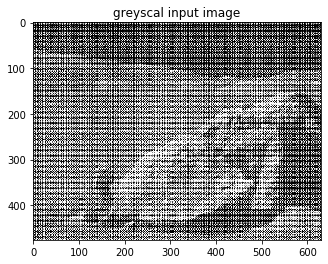

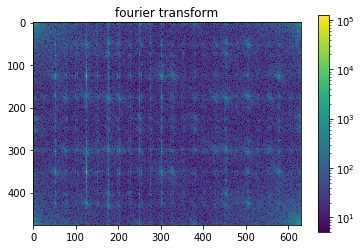

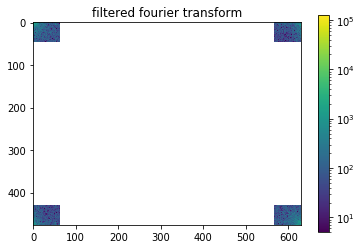

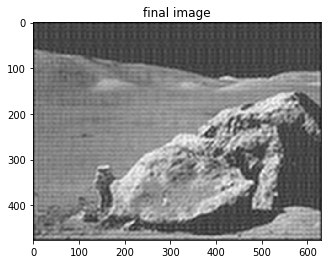

In [40]:
#import image in greyscale
def rgb_to_greyscale(img):
    R, G, B = img[:,:,0], img[:,:,1], img[:,:,2]
    img_array = 0.2989 * R + 0.5870 * G + 0.1140 * B
    return img_array

img_rgb = plt.imread("moonlanding.png")#.astype(float)
img_array = rgb_to_greyscale(img_rgb)
plt.imshow(img_array, cmap=plt.get_cmap('gray'))
plt.title('greyscal input image')
#plt.axis('off')
plt.show()

#2D FFT of the img_array
from scipy import fftpack
from matplotlib.colors import LogNorm

img_fft = fftpack.fft2(img_array)
plt.imshow(np.abs(img_fft), norm=LogNorm(vmin=5))
plt.title('fourier transform')
plt.colorbar()
plt.show()

#filter
keep_fraction = 0.1
img_fft_2 = img_fft.copy()
nr, nc = img_fft_2.shape
img_fft_2[int(nr*keep_fraction):int(nr*(1-keep_fraction))] = 0
img_fft_2[:, int(nc*keep_fraction):int(nc*(1-keep_fraction))] = 0
plt.imshow(np.abs(img_fft_2), norm=LogNorm(vmin=5))
plt.title('filtered fourier transform')
plt.colorbar()
plt.show()

#final image
img_new = fftpack.ifft2(img_fft_2).real
plt.imshow(img_new, plt.cm.gray)
plt.title('final image')
plt.axis('off')
plt.show()